## NLP:Text classification;Spam message detection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras



In [15]:
df=pd.read_csv("/SPAMTextMsg.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [17]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

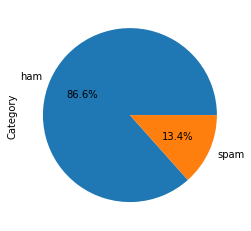

In [18]:
ratio=df['Category'].value_counts()
ratio.plot.pie(autopct='%1.1f%%')


In [19]:
df.replace('ham',0,inplace=True)
df.replace('spam',1,inplace=True)
df['Category']=df['Category'].astype('int8')
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [21]:
from keras.models  import Sequential
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer

In [22]:
texts=df['Message']
labels=df['Category']

In [23]:
NUM_WORDS=10000
MAX_TEXT_LEN=100
tokenizer=Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(texts)
#training the tokenizer

In [26]:
word_count=10
keys=list(tokenizer.word_index.keys())[:word_count]
values=list(tokenizer.word_index.values())[:word_count]
list(zip(keys,values))

#tokenizer dictionary

[('i', 1),
 ('to', 2),
 ('you', 3),
 ('a', 4),
 ('the', 5),
 ('u', 6),
 ('and', 7),
 ('in', 8),
 ('is', 9),
 ('me', 10)]

In [27]:
sequences=tokenizer.texts_to_sequences(texts)
index=3
print(texts[index])  #the textunder this index is converted to a vector
print(sequences[index])

X=pad_sequences(sequences,maxlen=MAX_TEXT_LEN) #standardization of the number of elements in a vector
y=labels.copy()

U dun say so early hor... U c already then say...
[6, 247, 150, 23, 381, 2995, 6, 139, 153, 57, 150]


In [28]:
from sklearn.model_selection import train_test_split

In [39]:
#splitting the dataset to training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)
print(f'Training sample size: {len(X_train)}')
print(f'Test sample size: {len(X_test)}')

Training sample size: 4457
Test sample size: 1115


In [40]:
from keras.layers import Dense,BatchNormalization,Embedding,LSTM
from keras.metrics import Accuracy
from keras import callbacks
from keras import utils


In [41]:
#Creating and trainingt he RNN(LSTM)
model=Sequential()
model.add(Embedding(NUM_WORDS,64,input_length=MAX_TEXT_LEN))
model.add(LSTM(3,return_sequences=True))
model.add(LSTM(5,return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(12))
model.add(Dense(1,activation='sigmoid'))

In [42]:

callbacks=[
    callbacks.EarlyStopping(monitor='loss',min_delta=0.01,patience=10,verbose=1),
    callbacks.ReduceLROnPlateau(monitor='loss',factor=0.1,min_delta=0.01,min_lr=1e-10,patience=4,verbose=1,mode='auto')
]

In [43]:
model.compile(metrics=['Accuracy'],loss='binary_crossentropy',optimizer='Adam')

In [44]:
history=model.fit(X_train,y_train,batch_size=50,epochs=10,validation_split=0.2,callbacks=callbacks)

Epoch 1/10
72/72 [==============================] - 16s 135ms/step - loss: 0.3172 - Accuracy: 0.9290 - val_loss: 0.3357 - val_Accuracy: 0.8576 - lr: 0.0010
Epoch 2/10
72/72 [==============================] - 9s 119ms/step - loss: 0.0648 - Accuracy: 0.9910 - val_loss: 0.1920 - val_Accuracy: 0.9473 - lr: 0.0010
Epoch 3/10
72/72 [==============================] - 8s 118ms/step - loss: 0.0286 - Accuracy: 0.9972 - val_loss: 0.1285 - val_Accuracy: 0.9686 - lr: 0.0010
Epoch 4/10
72/72 [==============================] - 9s 119ms/step - loss: 0.0153 - Accuracy: 0.9989 - val_loss: 0.0958 - val_Accuracy: 0.9765 - lr: 0.0010
Epoch 5/10
72/72 [==============================] - 8s 117ms/step - loss: 0.0103 - Accuracy: 0.9997 - val_loss: 0.0987 - val_Accuracy: 0.9776 - lr: 0.0010
Epoch 6/10
72/72 [==============================] - 8s 117ms/step - loss: 0.0075 - Accuracy: 0.9997 - val_loss: 0.0853 - val_Accuracy: 0.9742 - lr: 0.0010
Epoch 7/10
72/72 [==============================] - 8s 118ms/step - l

In [45]:
print(f'Metric on test: {model.evaluate(X_test, y_test)}')
print(f'Metric on train: {model.evaluate(X_train, y_train)}')

35/35 [==============================] - 1s 20ms/step - loss: 0.0788 - Accuracy: 0.9821
Metric on test: [0.07876840978860855, 0.9820627570152283]
140/140 [==============================] - 3s 21ms/step - loss: 0.0264 - Accuracy: 0.9942
Metric on train: [0.02636219561100006, 0.9941664934158325]


In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           640000    
                                                                 
 lstm_3 (LSTM)               (None, 100, 3)            816       
                                                                 
 lstm_4 (LSTM)               (None, 100, 5)            180       
                                                                 
 batch_normalization_1 (Batc  (None, 100, 5)           20        
 hNormalization)                                                 
                                                                 
 lstm_5 (LSTM)               (None, 12)                864       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                      

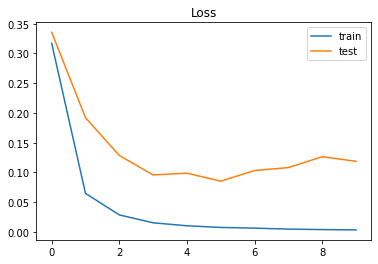

In [47]:
plt.title('Loss')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

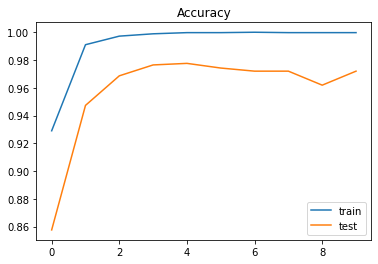

In [53]:
plt.title('Accuracy')
plt.plot(history.history['Accuracy'],label='train')
plt.plot(history.history['val_Accuracy'],label='test')
plt.legend()
plt.show()

In [50]:
model.metrics_names

['loss', 'Accuracy']

In [54]:
def ml_pipeline(text: str) -> str:
    """LSTM model prediction function for this sample"""
    try:
        sequence = tokenizer.texts_to_sequences([text])
        sequence = pad_sequences(sequence, maxlen=MAX_TEXT_LEN)
        if sequence.max() == 0:
            return 'Enter the words in English'
        else:
            predict = model.predict(sequence, verbose=0)
            if predict > 0.5:
                return 'The text is spam'
            else:
                return 'The text is not spam'
    except AttributeError:
        return 'Enter the text'

In [59]:
ml_pipeline('100 dating service call;l09064012103 box334sk38ch')

'The text is spam'